<h1 style="font-size:35px;
        color:black;
        ">Lab 5 Scalable Shor’s Algorithm </h1>

Prerequisites:
- [Ch.3.7 Shor's Algorithm](https://qiskit.org/textbook/ch-algorithms/shor.html)

Other relevant materials:
- [Experimental demonstration of Shor’s algorithm with quantum entanglement](https://arxiv.org/pdf/0705.1398.pdf)
- [Realization of a scalable Shor algorithm](https://arxiv.org/pdf/1507.08852.pdf)

In [2]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
import matplotlib.pyplot as plt

In [110]:
sim = Aer.get_backend('aer_simulator')
shots = 20000

def aer_sim_with_noise(circuit,noise=False):
    from qiskit.providers.aer.noise import NoiseModel
    simulator=Aer.get_backend('aer_simulator')
    qc = transpile(circuit, simulator)

    if noise:
        noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_lima'))
        result = execute(qc, simulator, noise_model=noise_model,shots=10000).result()
    else:
        result = execute(qc, simulator,shots=10000).result()

    counts = result.get_counts(qc)

    return result,counts

<h2 style="font-size:24px;">Part 1: Quantum circuit for Shor's algorithm</h2>




![](image/L5_Circ_gen.svg)

<h3 style="font-size: 20px">1. Remove redundancy.</h3>

<h4 style="font-size: 17px">Step A. Run the following cell to create the gate <code>U</code> for the function <code>7mod15</code>.</h4>

The unitary operator $U$ is defined as $U|x\rangle \equiv |7x(mod15)\rangle$.

In [277]:
## Create 7mod15 gate
N = 15
m = int(np.ceil(np.log2(N)))

U_qc = QuantumCircuit(m)
U_qc.x(range(m))
U_qc.swap(1, 2)
U_qc.swap(2, 3)
U_qc.swap(0, 3)

U = U_qc.to_gate()
U.name ='{}Mod{}'.format(7, N)

a) initial state = $\ket{1}$

In [278]:
### your code goes here
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
qc  = QuantumCircuit(qr,cr)

#for input_state_decimal in [10]:
input_state_decimal = 1
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reerse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()


1000


┌───┐┌─────────┐┌─┐         
q66904_0: ┤ X ├┤0        ├┤M├─────────
          └───┘│         │└╥┘┌─┐      
q66904_1: ─────┤1        ├─╫─┤M├──────
               │  7Mod15 │ ║ └╥┘┌─┐   
q66904_2: ─────┤2        ├─╫──╫─┤M├───
               │         │ ║  ║ └╥┘┌─┐
q66904_3: ─────┤3        ├─╫──╫──╫─┤M├
               └─────────┘ ║  ║  ║ └╥┘
  c123_0: ═════════════════╩══╬══╬══╬═
                              ║  ║  ║ 
  c123_1: ════════════════════╩══╬══╬═
                                 ║  ║ 
  c123_2: ═══════════════════════╩══╬═
                                    ║ 
  c123_3: ══════════════════════════╩═

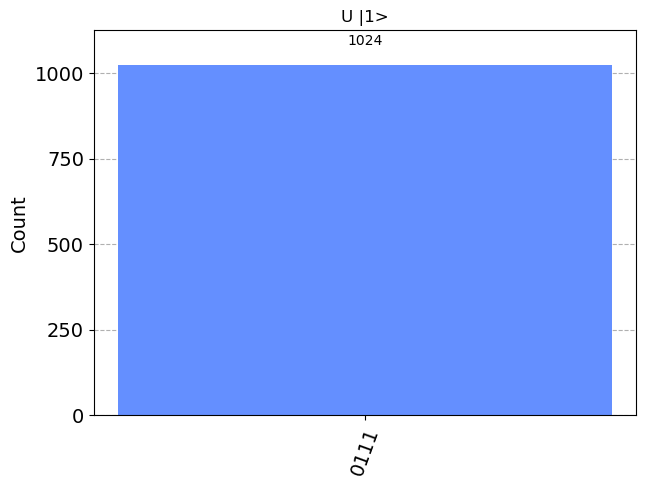

In [279]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts, title="U |1>")


b) initial state = $\ket{5}$

In [280]:
### your code goes here
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
qc  = QuantumCircuit(qr,cr)

#for input_state_decimal in [10]:
input_state_decimal = 5
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reerse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()


1010


┌───┐┌─────────┐┌─┐         
q66908_0: ┤ X ├┤0        ├┤M├─────────
          └───┘│         │└╥┘┌─┐      
q66908_1: ─────┤1        ├─╫─┤M├──────
          ┌───┐│  7Mod15 │ ║ └╥┘┌─┐   
q66908_2: ┤ X ├┤2        ├─╫──╫─┤M├───
          └───┘│         │ ║  ║ └╥┘┌─┐
q66908_3: ─────┤3        ├─╫──╫──╫─┤M├
               └─────────┘ ║  ║  ║ └╥┘
  c124_0: ═════════════════╩══╬══╬══╬═
                              ║  ║  ║ 
  c124_1: ════════════════════╩══╬══╬═
                                 ║  ║ 
  c124_2: ═══════════════════════╩══╬═
                                    ║ 
  c124_3: ══════════════════════════╩═

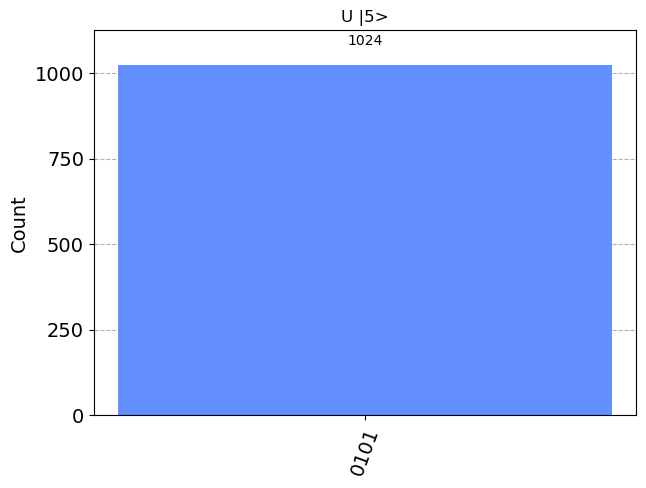

In [281]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
plot_histogram(counts, title="U |5>")


a) initial state = $\ket{13}$

In [282]:
### your code goes here
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
qc  = QuantumCircuit(qr,cr)

#define the input state in decimal
input_state_decimal = 13
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reverse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()


1011


┌───┐┌─────────┐┌─┐         
q66912_0: ┤ X ├┤0        ├┤M├─────────
          └───┘│         │└╥┘┌─┐      
q66912_1: ─────┤1        ├─╫─┤M├──────
          ┌───┐│  7Mod15 │ ║ └╥┘┌─┐   
q66912_2: ┤ X ├┤2        ├─╫──╫─┤M├───
          ├───┤│         │ ║  ║ └╥┘┌─┐
q66912_3: ┤ X ├┤3        ├─╫──╫──╫─┤M├
          └───┘└─────────┘ ║  ║  ║ └╥┘
  c125_0: ═════════════════╩══╬══╬══╬═
                              ║  ║  ║ 
  c125_1: ════════════════════╩══╬══╬═
                                 ║  ║ 
  c125_2: ═══════════════════════╩══╬═
                                    ║ 
  c125_3: ══════════════════════════╩═

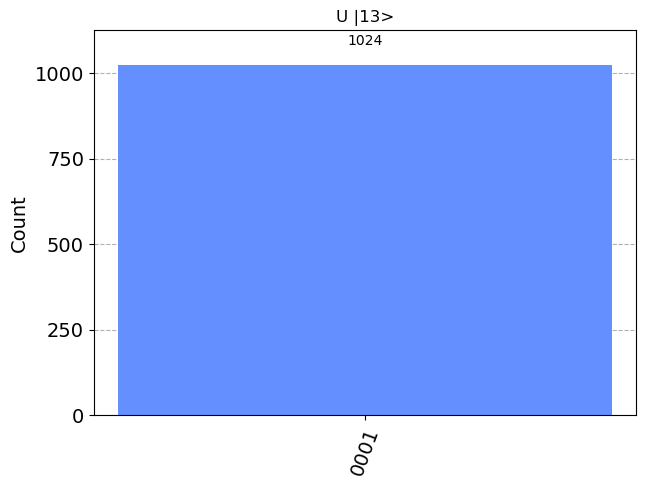

In [283]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
plot_histogram(counts, title="U |13>")


<h4 style="font-size: 17px">&#128211;Step B. Create a quantum circuit with $m$ qubits implementing $U$ gate $4(=2^{2})$ times and run it on the <code>aer_simulator</code> to obtain the matrix resprentation of the gates in the circuit.  Verify $U^{2^{2}} = I $  </h4>

In [284]:
### your code goes here

qr = QuantumRegister(m)
cr = ClassicalRegister(m)

qc = QuantumCircuit(qr,cr)


#define the input state in decimal
input_state_decimal = 7
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reverse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.append(U,qr)
qc.append(U,qr)
qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()








1110


┌───┐┌─────────┐┌─────────┐┌─────────┐┌─────────┐┌─┐         
q66916_0: ┤ X ├┤0        ├┤0        ├┤0        ├┤0        ├┤M├─────────
          ├───┤│         ││         ││         ││         │└╥┘┌─┐      
q66916_1: ┤ X ├┤1        ├┤1        ├┤1        ├┤1        ├─╫─┤M├──────
          ├───┤│  7Mod15 ││  7Mod15 ││  7Mod15 ││  7Mod15 │ ║ └╥┘┌─┐   
q66916_2: ┤ X ├┤2        ├┤2        ├┤2        ├┤2        ├─╫──╫─┤M├───
          └───┘│         ││         ││         ││         │ ║  ║ └╥┘┌─┐
q66916_3: ─────┤3        ├┤3        ├┤3        ├┤3        ├─╫──╫──╫─┤M├
               └─────────┘└─────────┘└─────────┘└─────────┘ ║  ║  ║ └╥┘
  c126_0: ══════════════════════════════════════════════════╩══╬══╬══╬═
                                                               ║  ║  ║ 
  c126_1: ═════════════════════════════════════════════════════╩══╬══╬═
                                                                  ║  ║ 
  c126_2: ════════════════════════════════════════════════════════╩══╬═
                                                                     ║ 
  c126_3: ═══════════════════════════════════════════════════════════╩═

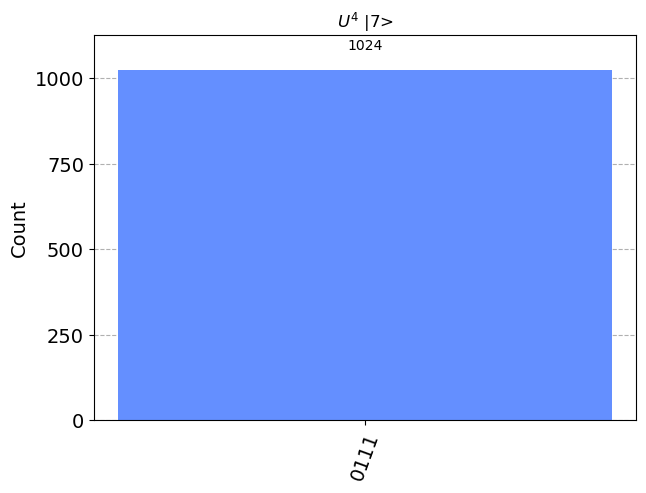

In [285]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
formatted_string = "$U^{4}$"
plot_histogram(counts, title="%s |7>"%formatted_string)





<h4 style="font-size: 17px">Step C. Run the cells below to see the reduced circuit, <code>shor_QPE</code>, and execute it on the <code>aer_simulator</code> to check if it reproduce the estimated phases in the Qiskit textbook Ch.3.9. </h4>

In [286]:
def cU_multi(k):
    circ = QuantumCircuit(m)
    for _ in range(2**k):
        circ.append(U, range(m))
    
    U_multi = circ.to_gate()
    U_multi.name = '7Mod15_[2^{}]'.format(k)
    
    cU_multi = U_multi.control()
    return cU_multi

In [287]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [288]:
# QPE circuit for Shor
t = 3 
shor_QPE = QuantumCircuit(t+m, t)
shor_QPE.h(range(t))

shor_QPE.x(t)
for idx in range(t-1):
    shor_QPE.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_QPE.append(qft_dag, range(t))
shor_QPE.measure(range(t), range(t))

shor_QPE.draw()

┌───┐                                  ┌───────┐┌─┐      
q_0: ┤ H ├────────■─────────────────────────┤0      ├┤M├──────
     ├───┤        │                         │       │└╥┘┌─┐   
q_1: ┤ H ├────────┼────────────────■────────┤1 QFT+ ├─╫─┤M├───
     ├───┤        │                │        │       │ ║ └╥┘┌─┐
q_2: ┤ H ├────────┼────────────────┼────────┤2      ├─╫──╫─┤M├
     ├───┤┌───────┴───────┐┌───────┴───────┐└───────┘ ║  ║ └╥┘
q_3: ┤ X ├┤0              ├┤0              ├──────────╫──╫──╫─
     └───┘│               ││               │          ║  ║  ║ 
q_4: ─────┤1              ├┤1              ├──────────╫──╫──╫─
          │  7Mod15_[2^0] ││  7Mod15_[2^1] │          ║  ║  ║ 
q_5: ─────┤2              ├┤2              ├──────────╫──╫──╫─
          │               ││               │          ║  ║  ║ 
q_6: ─────┤3              ├┤3              ├──────────╫──╫──╫─
          └───────────────┘└───────────────┘          ║  ║  ║ 
c_0: ═════════════════════════════════════════════════╩══╬══╬═
                                                         ║  ║ 
c_1: ════════════════════════════════════════════════════╩══╬═
                                                            ║ 
c_2: ═══════════════════════════════════════════════════════╩═

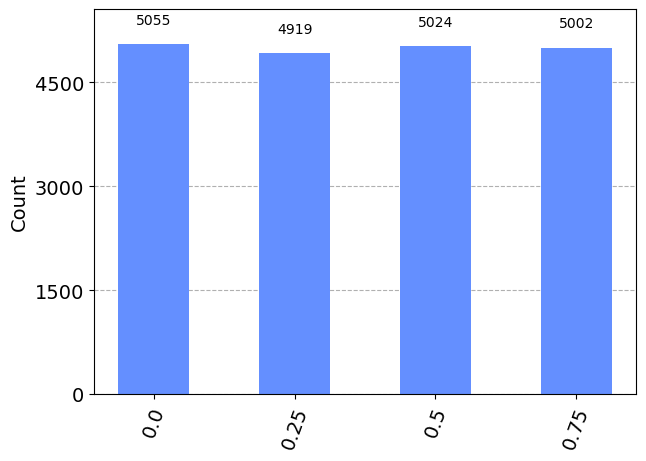

In [289]:
shor_QPE_trans = transpile(shor_QPE, sim)
count_QPE = sim.run(shor_QPE_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**3) for key in count_QPE.keys()]
count_new_QPE = dict(zip(key_new, count_QPE.values()))
plot_histogram(count_new_QPE)

<h2 style="font-size:24px;">Part 2: Noise simulation of the quantum order-finding circuits.</h2>




In [290]:
t = 2*m

shor_Orig = QuantumCircuit(t+m, t)
shor_Orig.h(range(t))

shor_Orig.x(t)
for idx in range(t):
    shor_Orig.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_Orig.append(qft_dag, range(t))
shor_Orig.measure(range(t), range(t))
    
shor_Orig.draw()

┌───┐                                                                    »
 q_0: ┤ H ├────────■───────────────────────────────────────────────────────────»
      ├───┤        │                                                           »
 q_1: ┤ H ├────────┼────────────────■──────────────────────────────────────────»
      ├───┤        │                │                                          »
 q_2: ┤ H ├────────┼────────────────┼────────────────■─────────────────────────»
      ├───┤        │                │                │                         »
 q_3: ┤ H ├────────┼────────────────┼────────────────┼────────────────■────────»
      ├───┤        │                │                │                │        »
 q_4: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤        │                │                │                │        »
 q_5: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤        │                │                │                │        »
 q_6: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤        │                │                │                │        »
 q_7: ┤ H ├────────┼────────────────┼────────────────┼────────────────┼────────»
      ├───┤┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐»
 q_8: ┤ X ├┤0              ├┤0              ├┤0              ├┤0              ├»
      └───┘│               ││               ││               ││               │»
 q_9: ─────┤1              ├┤1              ├┤1              ├┤1              ├»
           │  7Mod15_[2^0] ││  7Mod15_[2^1] ││  7Mod15_[2^2] ││  7Mod15_[2^3] │»
q_10: ─────┤2              ├┤2              ├┤2              ├┤2              ├»
           │               ││               ││               ││               │»
q_11: ─────┤3              ├┤3              ├┤3              ├┤3              ├»
           └───────────────┘└───────────────┘└───────────────┘└───────────────┘»
 c_0: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_1: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_2: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_3: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_4: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_5: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_6: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
 c_7: ═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                          »
« q_0: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_1: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_2: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_3: ────────────────────────────────────────────────────────────────────»
«                                                                    

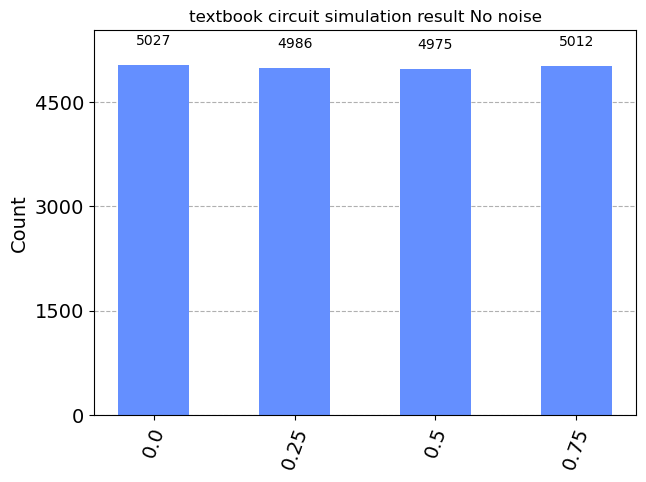

In [291]:
shor_Orig_trans = transpile(shor_Orig, sim)
count_Orig = sim.run(shor_Orig_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**t) for key in count_Orig.keys()]
count_new_Orig = dict(zip(key_new, count_Orig.values()))
plot_histogram(count_new_Orig, title='textbook circuit simulation result No noise')

In [292]:
from qiskit.test.mock import FakeMelbourne
from qiskit.providers.aer import AerSimulator

backend = FakeMelbourne()
sim_Melborne = AerSimulator.from_backend(backend)

shots=8192

/tmp/ipykernel_17875/4069782592.py:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeMelbourne


The comparison plot of the simulation results with/without noise for the textbook circuit `shor_Orig` is given below. The code is there to show how the result is generated but not recommended to run as it takes for long time.

In [293]:
shorOrig_trans = transpile(shor_Orig, backend, optimization_level=3)
count_shorOrig_noise = sim_Melborne.run(shor_Orig_trans, shots=shots).result().get_counts()

In [294]:
key_new = [str(np.round(int(key,2)/2**t,3)) for key in count_shorOrig_noise.keys()]
count_new_Orig_noise = dict(zip(key_new, count_shorOrig_noise.values()))

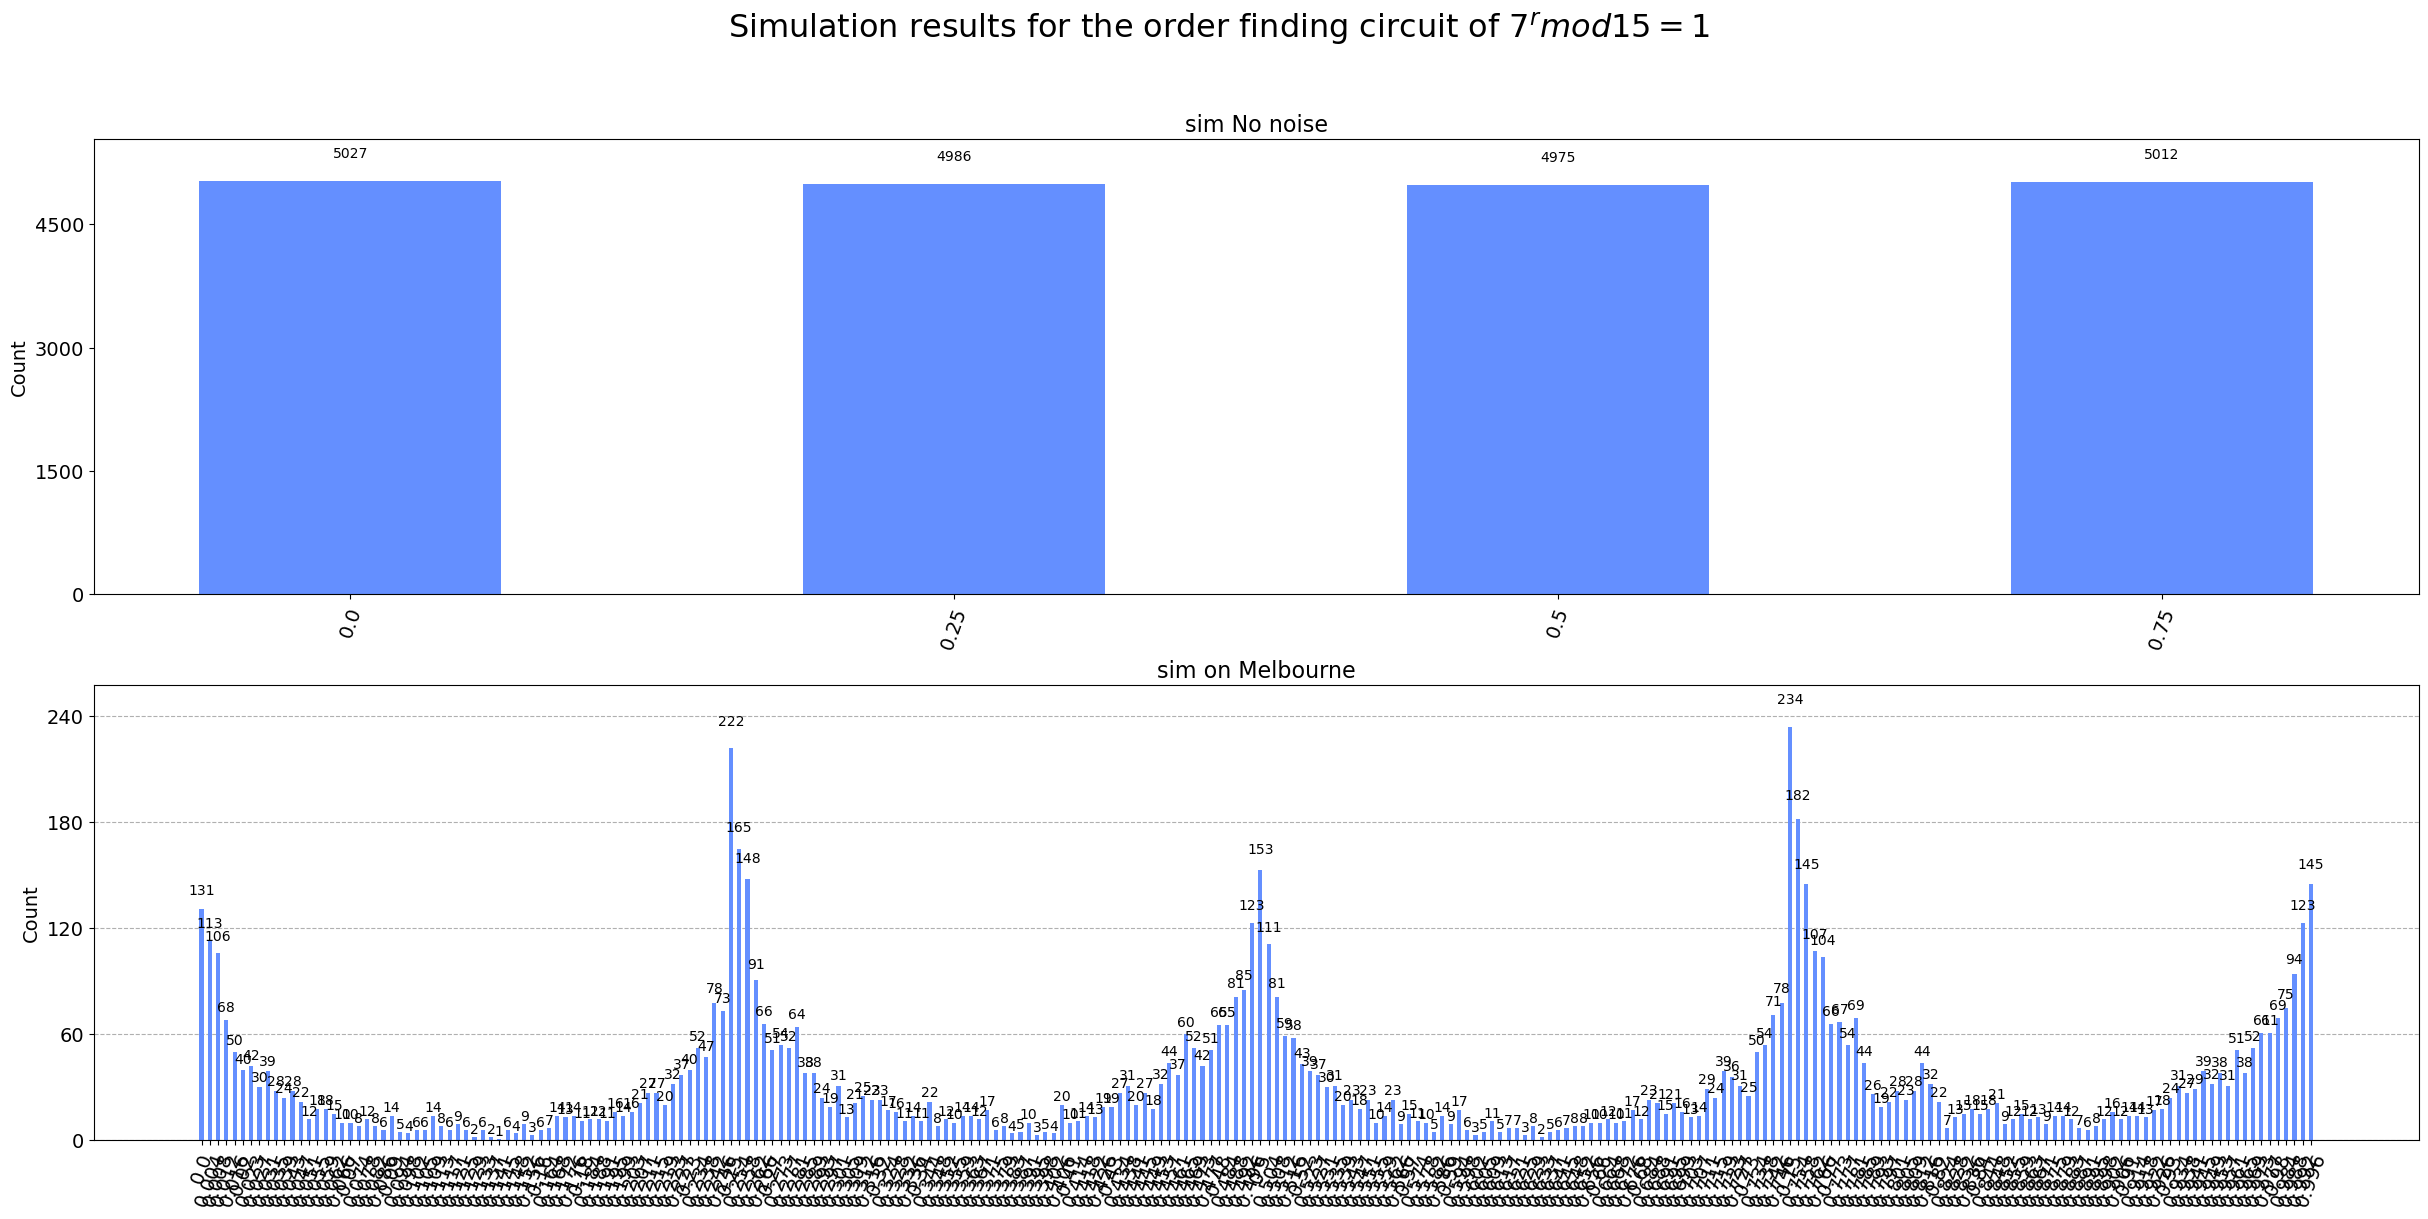

In [295]:
fig, ax = plt.subplots(2,1, figsize=(30,13))
fig.suptitle('Simulation results for the order finding circuit of $7^{r} mod 15 = 1$', fontsize=23)
plot_histogram(count_new_Orig, ax=ax[0])
plot_histogram(count_new_Orig_noise, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim on Melbourne', fontsize=16)
plt.show()

![](image/L5_textbook_result.png)

&#128211; Carry out the same task for the circuits, `shor_QPE`.

In [296]:
### your code goes here
shorQPE_trans = transpile(shor_QPE, backend, optimization_level=3)
count_shorQPE_noise = sim_Melborne.run(shor_QPE_trans, shots=shots).result().get_counts()



In [297]:
key_new = [str(np.round(int(key,2)/2**t,3)) for key in count_shorQPE_noise.keys()]
count_new_QPE_noise = dict(zip(key_new, count_shorQPE_noise.values()))




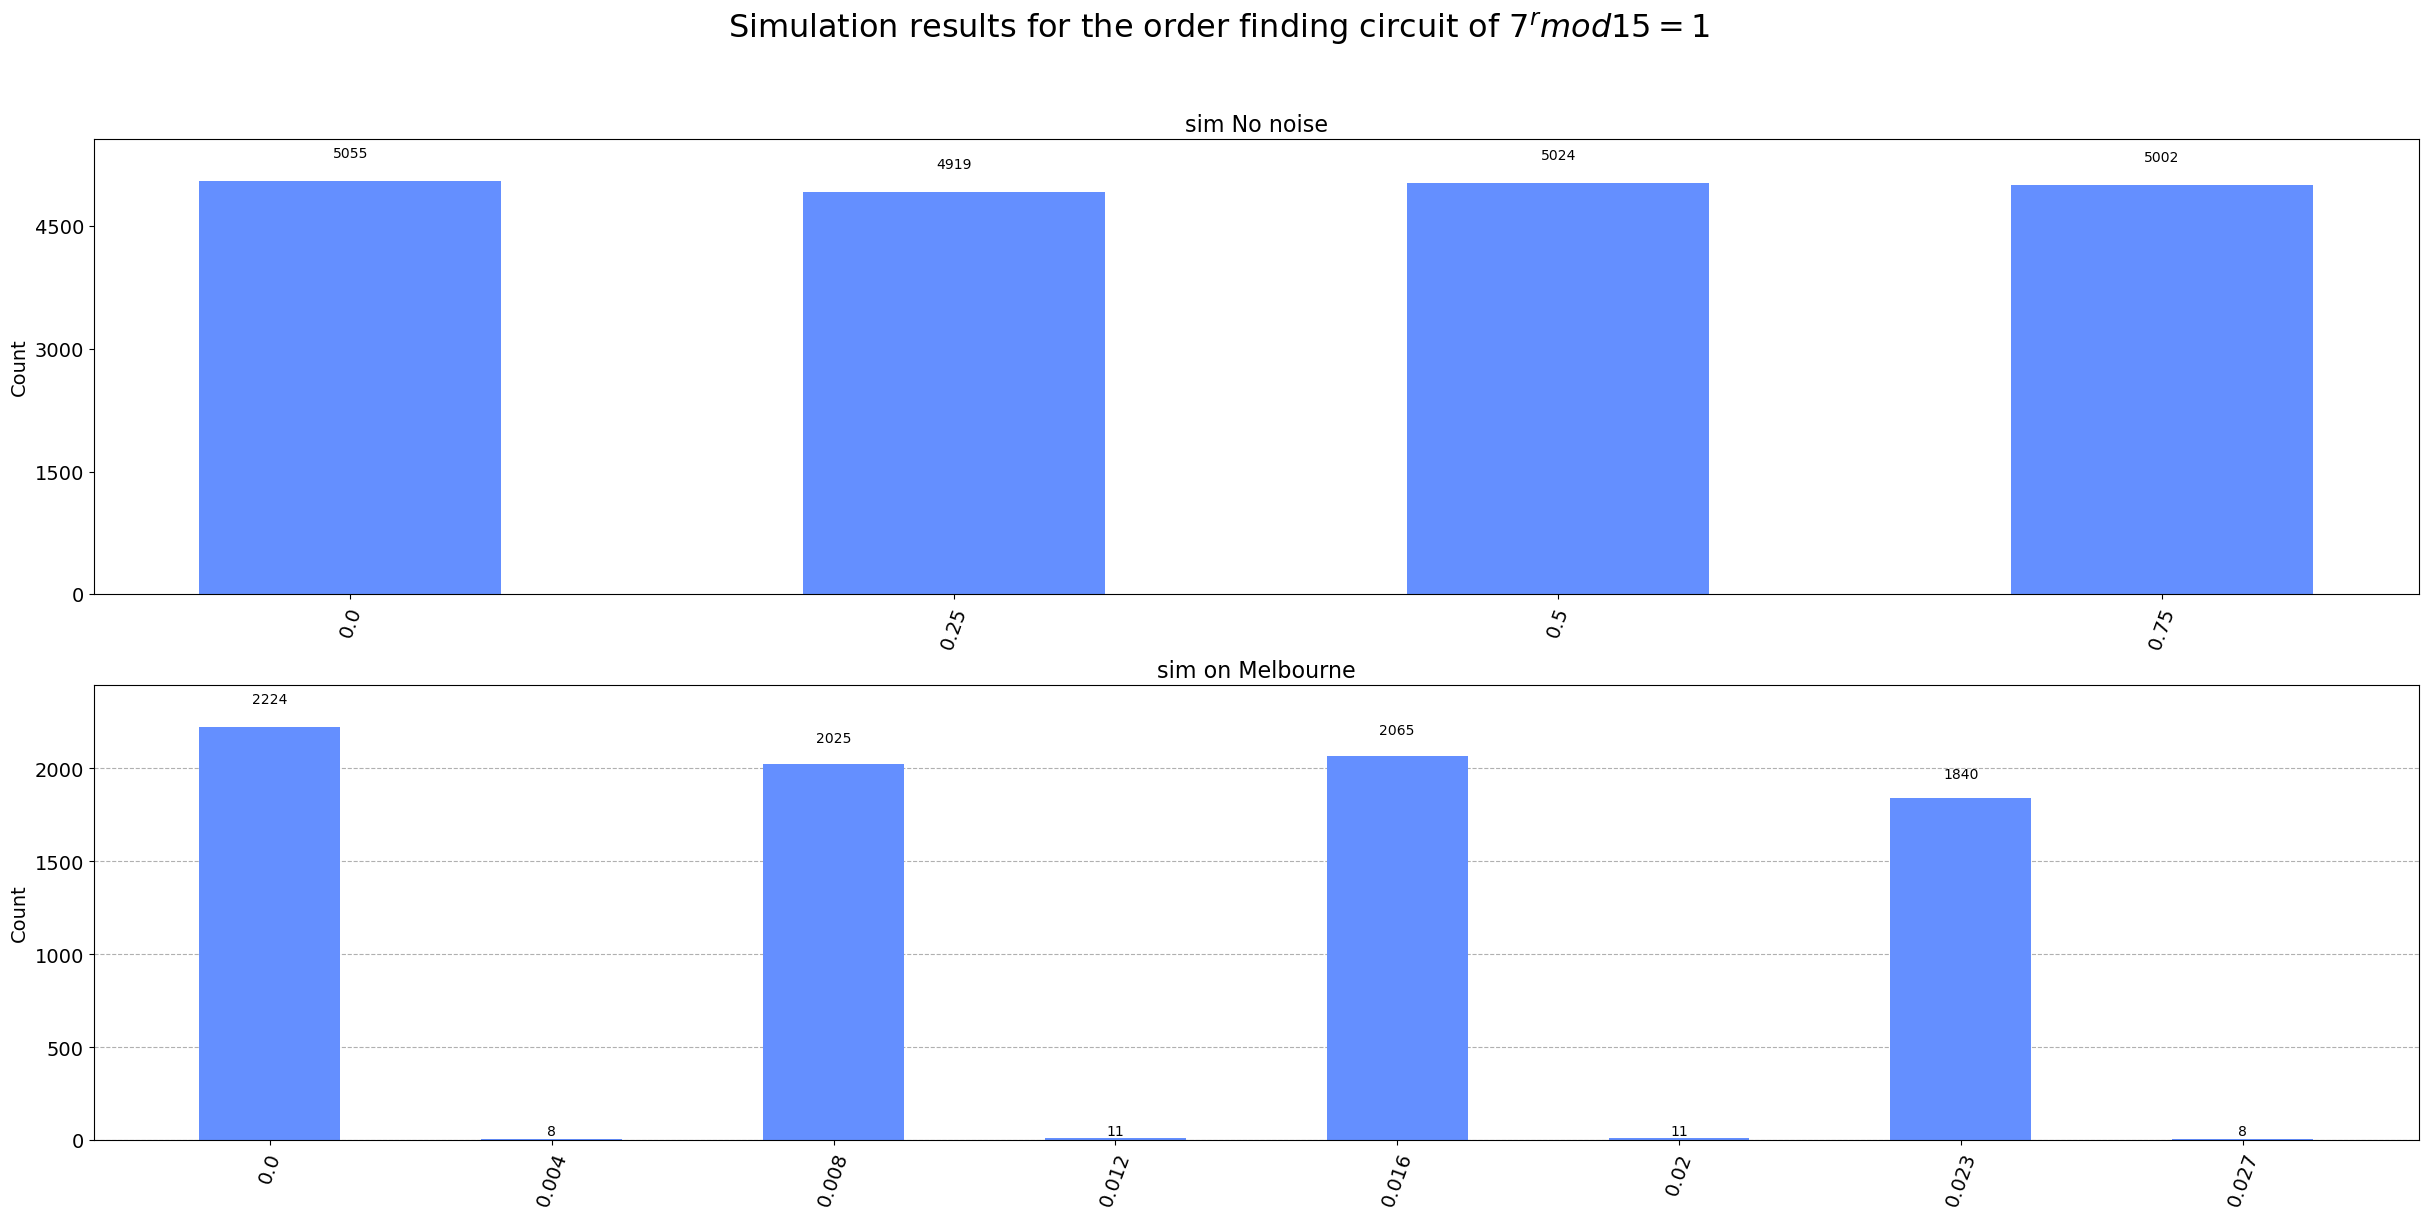

In [298]:

fig, ax = plt.subplots(2,1, figsize=(30,13))
fig.suptitle('Simulation results for the order finding circuit of $7^{r} mod 15 = 1$', fontsize=23)
plot_histogram(count_new_QPE, ax=ax[0])
plot_histogram(count_new_QPE_noise, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim on Melbourne', fontsize=16)
plt.show()












# Making things interesting (Additional stuff)
### Running the circuit for a general parameterized N and a

In [4]:
def c_amodN(a,m, power):
    """Controlled multiplication by a mod N"""
    _a_list = []
    _a_list_complimentary = []
    for i in range(1,m):
        _a_list.append(2**i)
        _a_list_complimentary.append(2**m - 1 - 2**i)

    
    if a not in _a_list and a not in _a_list_complimentary:
        raise ValueError("'a' must be in " + str(_a_list) + " or "+ str(_a_list_complimentary))
    U = QuantumCircuit(m)
    _a = a if a%2 == 0 else 2**m - a -1
    s = int(np.ceil(np.log2(_a)))
    #print("s is "+str(s))
    _temp_list = np.arange(0,m).tolist()
    #_temp_list = _temp_list[::-1]
    #print(_temp_list)
    for iteration in range(power):
        for i in range(m):
            if (_temp_list[i] != (i+s)%m):
                k = _temp_list.index((i+s)%m)
                U.swap(m-1-i,m-1-k)
                _temp_list[i], _temp_list[k] = _temp_list[k], _temp_list[i]
                #print("swapping "+str(i)+" and "+str(k)+" bits temp_list = " + str(_temp_list))
        if a in _a_list_complimentary:
            for q in range(m):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod %i" % (a, power, 2**m -1)
    #c_U = U.control()
    return U


a) initial state = $\ket{1}$

In [6]:
### your code goes here
m = 16
N = 2**m -1
a = 8

U = c_amodN(a,m,1)
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
qc  = QuantumCircuit(qr,cr)

#for input_state_decimal in [10]:
input_state_decimal = 13
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reverse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print("The value of N is "+str(N)+ " and is "+str(a))

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()


The value of N is 65535 and is 8


┌───┐┌─────────────────┐┌─┐                                             
 q0_0: ┤ X ├┤0                ├┤M├─────────────────────────────────────────────
       └───┘│                 │└╥┘┌─┐                                          
 q0_1: ─────┤1                ├─╫─┤M├──────────────────────────────────────────
       ┌───┐│                 │ ║ └╥┘┌─┐                                       
 q0_2: ┤ X ├┤2                ├─╫──╫─┤M├───────────────────────────────────────
       ├───┤│                 │ ║  ║ └╥┘┌─┐                                    
 q0_3: ┤ X ├┤3                ├─╫──╫──╫─┤M├────────────────────────────────────
       └───┘│                 │ ║  ║  ║ └╥┘┌─┐                                 
 q0_4: ─────┤4                ├─╫──╫──╫──╫─┤M├─────────────────────────────────
            │                 │ ║  ║  ║  ║ └╥┘┌─┐                              
 q0_5: ─────┤5                ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
            │                 │ ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q0_6: ─────┤6                ├─╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
            │                 │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
 q0_7: ─────┤7                ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
            │   8^1 mod 65535 │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
 q0_8: ─────┤8                ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
 q0_9: ─────┤9                ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
q0_10: ─────┤10               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
q0_11: ─────┤11               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
q0_12: ─────┤12               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
q0_13: ─────┤13               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q0_14: ─────┤14               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
            │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q0_15: ─────┤15               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
            └─────────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
 c0_0: ═════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                   ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_1: ════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                      ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_2: ═══════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                         ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_3: ══════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                            ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_4: ═════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                               ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_5: ════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                                  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_6: ═══════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                                     ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_7: ══════════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬═
                                                        ║  ║  ║  ║  ║  ║  ║  ║ 
 c0_8: ═════════════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬═
       

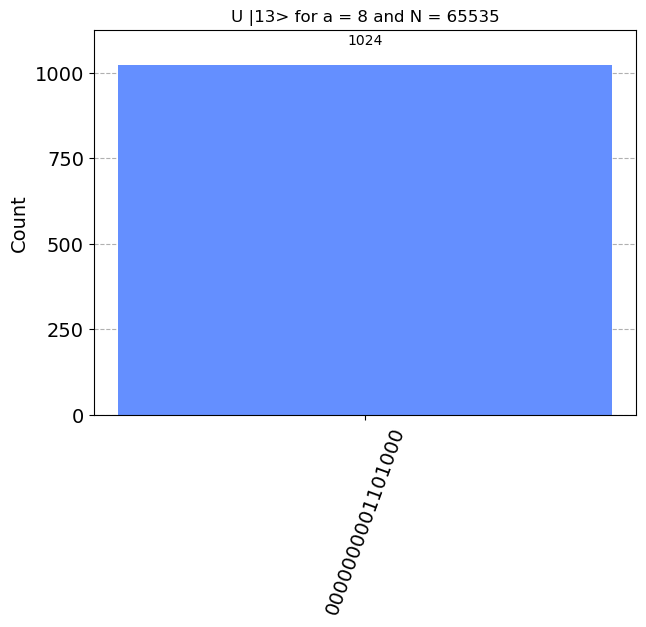

In [304]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts, title="U |"+str(input_state_decimal)+"> for a = "+str(a)+" and N = "+str(N))


b) initial state = $\ket{5}$

In [305]:
### your code goes here
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
qc  = QuantumCircuit(qr,cr)

#for input_state_decimal in [10]:
input_state_decimal = 5
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reerse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()


1010000000000000


┌───┐┌─────────────────┐┌─┐                                       »
 q133361_0: ┤ X ├┤0                ├┤M├───────────────────────────────────────»
            └───┘│                 │└╥┘┌─┐                                    »
 q133361_1: ─────┤1                ├─╫─┤M├────────────────────────────────────»
            ┌───┐│                 │ ║ └╥┘┌─┐                                 »
 q133361_2: ┤ X ├┤2                ├─╫──╫─┤M├─────────────────────────────────»
            └───┘│                 │ ║  ║ └╥┘┌─┐                              »
 q133361_3: ─────┤3                ├─╫──╫──╫─┤M├──────────────────────────────»
                 │                 │ ║  ║  ║ └╥┘┌─┐                           »
 q133361_4: ─────┤4                ├─╫──╫──╫──╫─┤M├───────────────────────────»
                 │                 │ ║  ║  ║  ║ └╥┘┌─┐                        »
 q133361_5: ─────┤5                ├─╫──╫──╫──╫──╫─┤M├────────────────────────»
                 │                 │ ║  ║  ║  ║  ║ └╥┘┌─┐                     »
 q133361_6: ─────┤6                ├─╫──╫──╫──╫──╫──╫─┤M├─────────────────────»
                 │                 │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  »
 q133361_7: ─────┤7                ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────»
                 │   8^1 mod 65535 │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               »
 q133361_8: ─────┤8                ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            »
 q133361_9: ─────┤9                ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
q133361_10: ─────┤10               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
q133361_11: ─────┤11               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
q133361_12: ─────┤12               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
q133361_13: ─────┤13               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
q133361_14: ─────┤14               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q133361_15: ─────┤15               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
                 └─────────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_0: ═════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                        ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_1: ════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                           ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_2: ═══════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_3: ══════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                                 ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_4: ═════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                                    ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_5: ════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬═»
                                                       ║  ║  ║  ║  ║  ║  ║  ║ »
    c128_6: ═══════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬═»
                                                          ║  ║  ║  ║  ║  ║  ║ »
    c128_7: ══════════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬═»
                                                             ║  ║  ║  ║  ║  ║ »
    c128_8: ═════════════════════════════════════════════════╩══╬══╬══╬══╬══╬═»
            

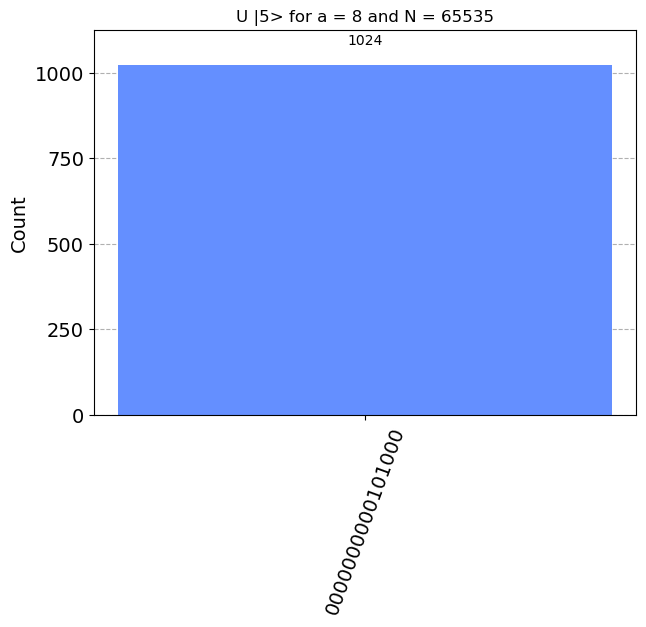

In [306]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
plot_histogram(counts, title="U |"+str(input_state_decimal)+"> for a = "+str(a)+" and N = "+str(N))


a) initial state = $\ket{13}$

In [307]:
### your code goes here
qr = QuantumRegister(m)
cr = ClassicalRegister(m)
qc  = QuantumCircuit(qr,cr)

#define the input state in decimal
input_state_decimal = 13
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reverse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

qc.append(U,qr)
qc.measure(qr,cr)
qc.draw()


1011000000000000


┌───┐┌─────────────────┐┌─┐                                       »
 q133365_0: ┤ X ├┤0                ├┤M├───────────────────────────────────────»
            └───┘│                 │└╥┘┌─┐                                    »
 q133365_1: ─────┤1                ├─╫─┤M├────────────────────────────────────»
            ┌───┐│                 │ ║ └╥┘┌─┐                                 »
 q133365_2: ┤ X ├┤2                ├─╫──╫─┤M├─────────────────────────────────»
            ├───┤│                 │ ║  ║ └╥┘┌─┐                              »
 q133365_3: ┤ X ├┤3                ├─╫──╫──╫─┤M├──────────────────────────────»
            └───┘│                 │ ║  ║  ║ └╥┘┌─┐                           »
 q133365_4: ─────┤4                ├─╫──╫──╫──╫─┤M├───────────────────────────»
                 │                 │ ║  ║  ║  ║ └╥┘┌─┐                        »
 q133365_5: ─────┤5                ├─╫──╫──╫──╫──╫─┤M├────────────────────────»
                 │                 │ ║  ║  ║  ║  ║ └╥┘┌─┐                     »
 q133365_6: ─────┤6                ├─╫──╫──╫──╫──╫──╫─┤M├─────────────────────»
                 │                 │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  »
 q133365_7: ─────┤7                ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────»
                 │   8^1 mod 65535 │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               »
 q133365_8: ─────┤8                ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            »
 q133365_9: ─────┤9                ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
q133365_10: ─────┤10               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
q133365_11: ─────┤11               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
q133365_12: ─────┤12               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
q133365_13: ─────┤13               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
q133365_14: ─────┤14               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
                 │                 │ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q133365_15: ─────┤15               ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
                 └─────────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_0: ═════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                        ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_1: ════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                           ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_2: ═══════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                              ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_3: ══════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                                 ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_4: ═════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬══╬═»
                                                    ║  ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_5: ════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬═»
                                                       ║  ║  ║  ║  ║  ║  ║  ║ »
    c129_6: ═══════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬══╬═»
                                                          ║  ║  ║  ║  ║  ║  ║ »
    c129_7: ══════════════════════════════════════════════╩══╬══╬══╬══╬══╬══╬═»
                                                             ║  ║  ║  ║  ║  ║ »
    c129_8: ═════════════════════════════════════════════════╩══╬══╬══╬══╬══╬═»
            

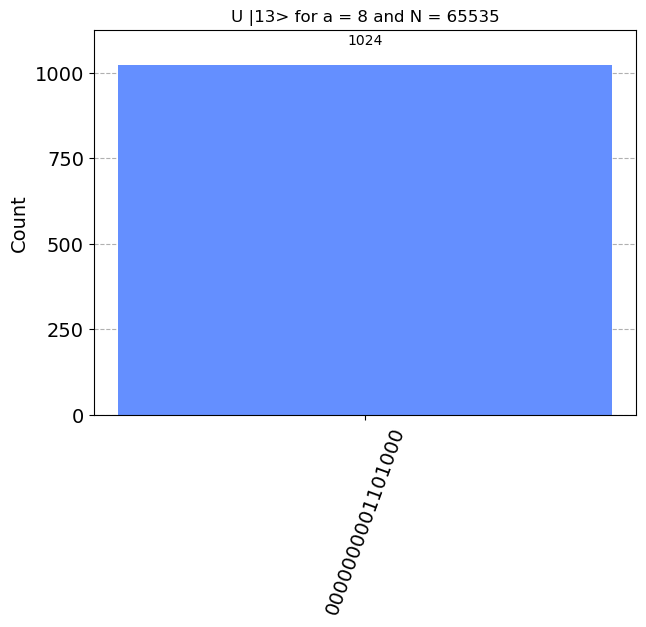

In [308]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
plot_histogram(counts, title="U |"+str(input_state_decimal)+"> for a = "+str(a)+" and N = "+str(N))


<h4 style="font-size: 17px">&#128211;Step B. Create a quantum circuit with $m$ qubits implementing $U$ gate m times and run it on the <code>aer_simulator</code> to obtain the matrix resprentation of the gates in the circuit.  Verify $U^{2^{2}} = I $  </h4>

In [315]:
### your code goes here

qr = QuantumRegister(m)
cr = ClassicalRegister(m)

qc = QuantumCircuit(qr,cr)


#define the input state in decimal
input_state_decimal = 7
input_state_string = bin(input_state_decimal)[2::].zfill(m)
#reverse the string because qiskit does everything in reverse(?)
input_state_string = input_state_string[::-1]
print(input_state_string)

for i in range(m):
    if input_state_string[i] == '1':
        qc.x(i)

for i in range(m):
    qc.append(U,qr)

qc.measure(qr,cr)
qc.draw()








1110000000000000


┌───┐┌─────────────────┐┌─────────────────┐┌─────────────────┐»
 q133380_0: ┤ X ├┤0                ├┤0                ├┤0                ├»
            ├───┤│                 ││                 ││                 │»
 q133380_1: ┤ X ├┤1                ├┤1                ├┤1                ├»
            ├───┤│                 ││                 ││                 │»
 q133380_2: ┤ X ├┤2                ├┤2                ├┤2                ├»
            └───┘│                 ││                 ││                 │»
 q133380_3: ─────┤3                ├┤3                ├┤3                ├»
                 │                 ││                 ││                 │»
 q133380_4: ─────┤4                ├┤4                ├┤4                ├»
                 │                 ││                 ││                 │»
 q133380_5: ─────┤5                ├┤5                ├┤5                ├»
                 │                 ││                 ││                 │»
 q133380_6: ─────┤6                ├┤6                ├┤6                ├»
                 │                 ││                 ││                 │»
 q133380_7: ─────┤7                ├┤7                ├┤7                ├»
                 │   8^1 mod 65535 ││   8^1 mod 65535 ││   8^1 mod 65535 │»
 q133380_8: ─────┤8                ├┤8                ├┤8                ├»
                 │                 ││                 ││                 │»
 q133380_9: ─────┤9                ├┤9                ├┤9                ├»
                 │                 ││                 ││                 │»
q133380_10: ─────┤10               ├┤10               ├┤10               ├»
                 │                 ││                 ││                 │»
q133380_11: ─────┤11               ├┤11               ├┤11               ├»
                 │                 ││                 ││                 │»
q133380_12: ─────┤12               ├┤12               ├┤12               ├»
                 │                 ││                 ││                 │»
q133380_13: ─────┤13               ├┤13               ├┤13               ├»
                 │                 ││                 ││                 │»
q133380_14: ─────┤14               ├┤14               ├┤14               ├»
                 │                 ││                 ││                 │»
q133380_15: ─────┤15               ├┤15               ├┤15               ├»
                 └─────────────────┘└─────────────────┘└─────────────────┘»
    c133_0: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_1: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_2: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_3: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_4: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_5: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_6: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_7: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_8: ══════════════════════════════════════════════════════════════»
                                                                          »
    c133_9: ══════════════════════════════════════════════════════════════»
                                                            

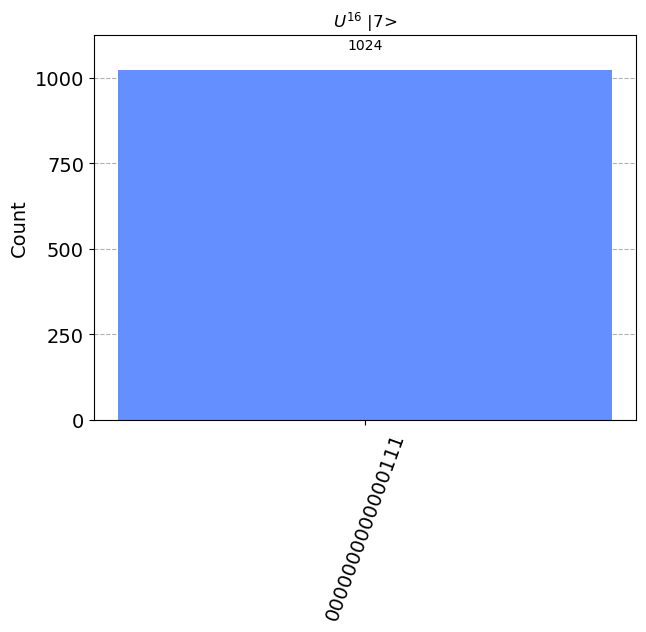

In [325]:

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)
formatted_string = "$U^{"+str(m)+"}$"
plot_histogram(counts, title="%s |"%formatted_string+str(input_state_decimal)+">")





<h4 style="font-size: 17px">Step C. Run the cells below to see the reduced circuit, <code>shor_QPE</code>, and execute it on the <code>aer_simulator</code> to check if it reproduce the estimated phases in the Qiskit textbook Ch.3.9. </h4>

In [121]:
# redefine a, m and U

m = 6
a = 4
U = c_amodN(a,m,1)


In [122]:
def cU_multi(k):
    circ = QuantumCircuit(m)
    for _ in range(2**k):
        circ.append(U, range(m))
    
    U_multi = circ.to_gate()
    U_multi.name = 'aModN_[2^{}]'.format(k)
    
    cU_multi = U_multi.control()
    return cU_multi

In [123]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [124]:
# QPE circuit for Shor
t = 3 
shor_QPE = QuantumCircuit(t+m, t)
shor_QPE.h(range(t))

shor_QPE.x(t)
for idx in range(t-1):
    shor_QPE.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_QPE.append(qft_dag, range(t))
shor_QPE.measure(range(t), range(t))

shor_QPE.draw()

┌───┐                                ┌───────┐┌─┐      
q_0: ┤ H ├───────■────────────────────────┤0      ├┤M├──────
     ├───┤       │                        │       │└╥┘┌─┐   
q_1: ┤ H ├───────┼───────────────■────────┤1 QFT+ ├─╫─┤M├───
     ├───┤       │               │        │       │ ║ └╥┘┌─┐
q_2: ┤ H ├───────┼───────────────┼────────┤2      ├─╫──╫─┤M├
     ├───┤┌──────┴───────┐┌──────┴───────┐└───────┘ ║  ║ └╥┘
q_3: ┤ X ├┤0             ├┤0             ├──────────╫──╫──╫─
     └───┘│              ││              │          ║  ║  ║ 
q_4: ─────┤1             ├┤1             ├──────────╫──╫──╫─
          │              ││              │          ║  ║  ║ 
q_5: ─────┤2             ├┤2             ├──────────╫──╫──╫─
          │  aModN_[2^0] ││  aModN_[2^1] │          ║  ║  ║ 
q_6: ─────┤3             ├┤3             ├──────────╫──╫──╫─
          │              ││              │          ║  ║  ║ 
q_7: ─────┤4             ├┤4             ├──────────╫──╫──╫─
          │              ││              │          ║  ║  ║ 
q_8: ─────┤5             ├┤5             ├──────────╫──╫──╫─
          └──────────────┘└──────────────┘          ║  ║  ║ 
c_0: ═══════════════════════════════════════════════╩══╬══╬═
                                                       ║  ║ 
c_1: ══════════════════════════════════════════════════╩══╬═
                                                          ║ 
c_2: ═════════════════════════════════════════════════════╩═

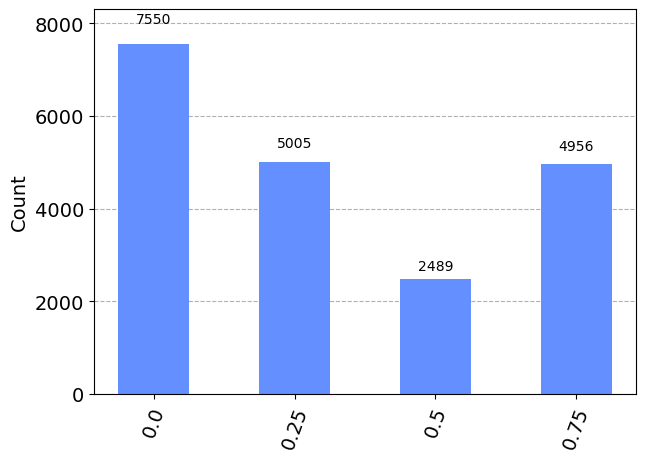

In [125]:
shor_QPE_trans = transpile(shor_QPE, sim)
count_QPE = sim.run(shor_QPE_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**3) for key in count_QPE.keys()]
count_new_QPE = dict(zip(key_new, count_QPE.values()))
plot_histogram(count_new_QPE)

<h2 style="font-size:24px;">Part 2: Noise simulation of the quantum order-finding circuits.</h2>




In [126]:

t = 2*m

shor_Orig = QuantumCircuit(t+m, t)
shor_Orig.h(range(t))

shor_Orig.x(t)
for idx in range(t):
    shor_Orig.append(cU_multi(idx), [idx]+ list(range(t,t+m)))

qft_dag = qft(t).inverse()
qft_dag.name = 'QFT+'

shor_Orig.append(qft_dag, range(t))
shor_Orig.measure(range(t), range(t))
    
shor_Orig.draw()

┌───┐                                                                »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────────»
      ├───┤       │                                                        »
 q_1: ┤ H ├───────┼───────────────■────────────────────────────────────────»
      ├───┤       │               │                                        »
 q_2: ┤ H ├───────┼───────────────┼───────────────■────────────────────────»
      ├───┤       │               │               │                        »
 q_3: ┤ H ├───────┼───────────────┼───────────────┼───────────────■────────»
      ├───┤       │               │               │               │        »
 q_4: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_5: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_6: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_7: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_8: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
 q_9: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
q_10: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤       │               │               │               │        »
q_11: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────»
      ├───┤┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐»
q_12: ┤ X ├┤0             ├┤0             ├┤0             ├┤0             ├»
      └───┘│              ││              ││              ││              │»
q_13: ─────┤1             ├┤1             ├┤1             ├┤1             ├»
           │              ││              ││              ││              │»
q_14: ─────┤2             ├┤2             ├┤2             ├┤2             ├»
           │  aModN_[2^0] ││  aModN_[2^1] ││  aModN_[2^2] ││  aModN_[2^3] │»
q_15: ─────┤3             ├┤3             ├┤3             ├┤3             ├»
           │              ││              ││              ││              │»
q_16: ─────┤4             ├┤4             ├┤4             ├┤4             ├»
           │              ││              ││              ││              │»
q_17: ─────┤5             ├┤5             ├┤5             ├┤5             ├»
           └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
 c_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_2: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_3: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_4: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_5: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_6: ═════════════════════════════════════════════════════════════════════»
                                                                           »
 c_7: ═════════════════════════════════════════════════════════════════════»
  

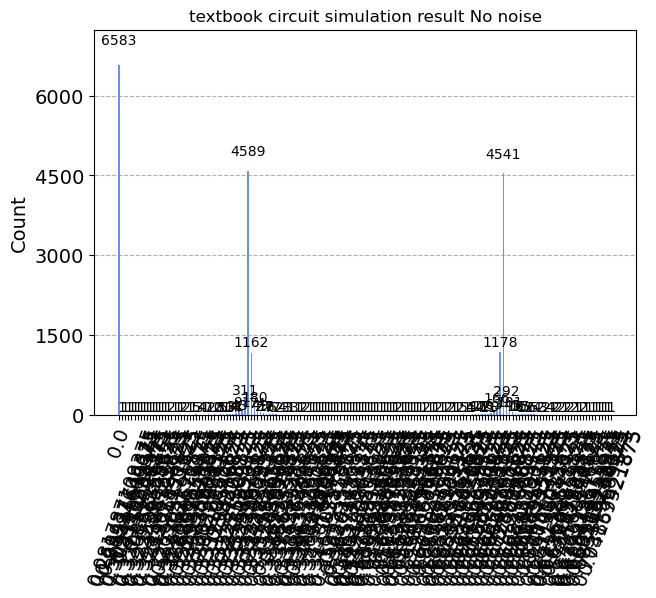

In [127]:
shor_Orig_trans = transpile(shor_Orig, sim)
count_Orig = sim.run(shor_Orig_trans, shots=shots).result().get_counts()
key_new = [str(int(key,2)/2**t) for key in count_Orig.keys()]
count_new_Orig = dict(zip(key_new, count_Orig.values()))
plot_histogram(count_new_Orig, title='textbook circuit simulation result No noise')

In [129]:
from qiskit.test.mock import FakeMelbourne
from qiskit.test.mock import FakeVigo
from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeCairo



backend = FakeCairo()
sim_Melborne = AerSimulator.from_backend(backend)

#IBMQ.load_account()
#
#provider = IBMQ.get_provider('ibm-q')
#provider.backends()
#backend = provider.get_backend('ibmq_qasm_simulator')
#sim_Melborne = provider.get_backend('ibmq_qasm_simulator')
#
#device_backend = provider.get_backend('ibmq_belem')
#noise_model = qiskit.providers.aer.noise.NoiseModel.from_backend(device_backend)
#sim_Melborne.options.update_options(noise_model=noise_model)

#sim_Melborne = AerSimulator.from_backend(backend)

shots=8192


/tmp/ipykernel_25965/1057267855.py:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeMelbourne
/tmp/ipykernel_25965/1057267855.py:2: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeVigo
/tmp/ipykernel_25965/1057267855.py:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeCairo
/home/amanmehta/tools/anaconda3/lib/python3.9/site-packages/qiskit_aer/noise/device/mode

In [130]:

for _bk in Aer.backends():
    print(_bk)
backend.configuration().n_qubits


aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


27

The comparison plot of the simulation results with/without noise for the textbook circuit `shor_Orig` is given below. The code is there to show how the result is generated but not recommended to run as it takes for long time.

In [131]:
from qiskit.providers.aer.noise import NoiseModel
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')


ibmqfactory.load_account:WARNING:2022-11-22 00:44:24,503: Credentials are already in use. The existing account in the session will be replaced.


In [132]:

#shorOrig_trans = transpile(shor_Orig, backend, optimization_level=3)
#count_shorOrig_noise = sim_Melborne.run(shor_Orig_trans, shots=shots).result().get_counts()

shorOrig_trans = transpile(shor_Orig, sim, optimization_level=3)
#noise_model = NoiseModel.from_backend(provider.get_backend('ibmq_lima'))
#count_shorOrig_noise = execute(shorOrig_trans, sim, noise_model=noise_model,shots=10000).result().get_counts()

res,count_shorOrig_noise = aer_sim_with_noise(shor_Orig,noise=True)

In [133]:
key_new = [str(np.round(int(key,2)/2**t,3)) for key in count_shorOrig_noise.keys()]
count_new_Orig_noise = dict(zip(key_new, count_shorOrig_noise.values()))

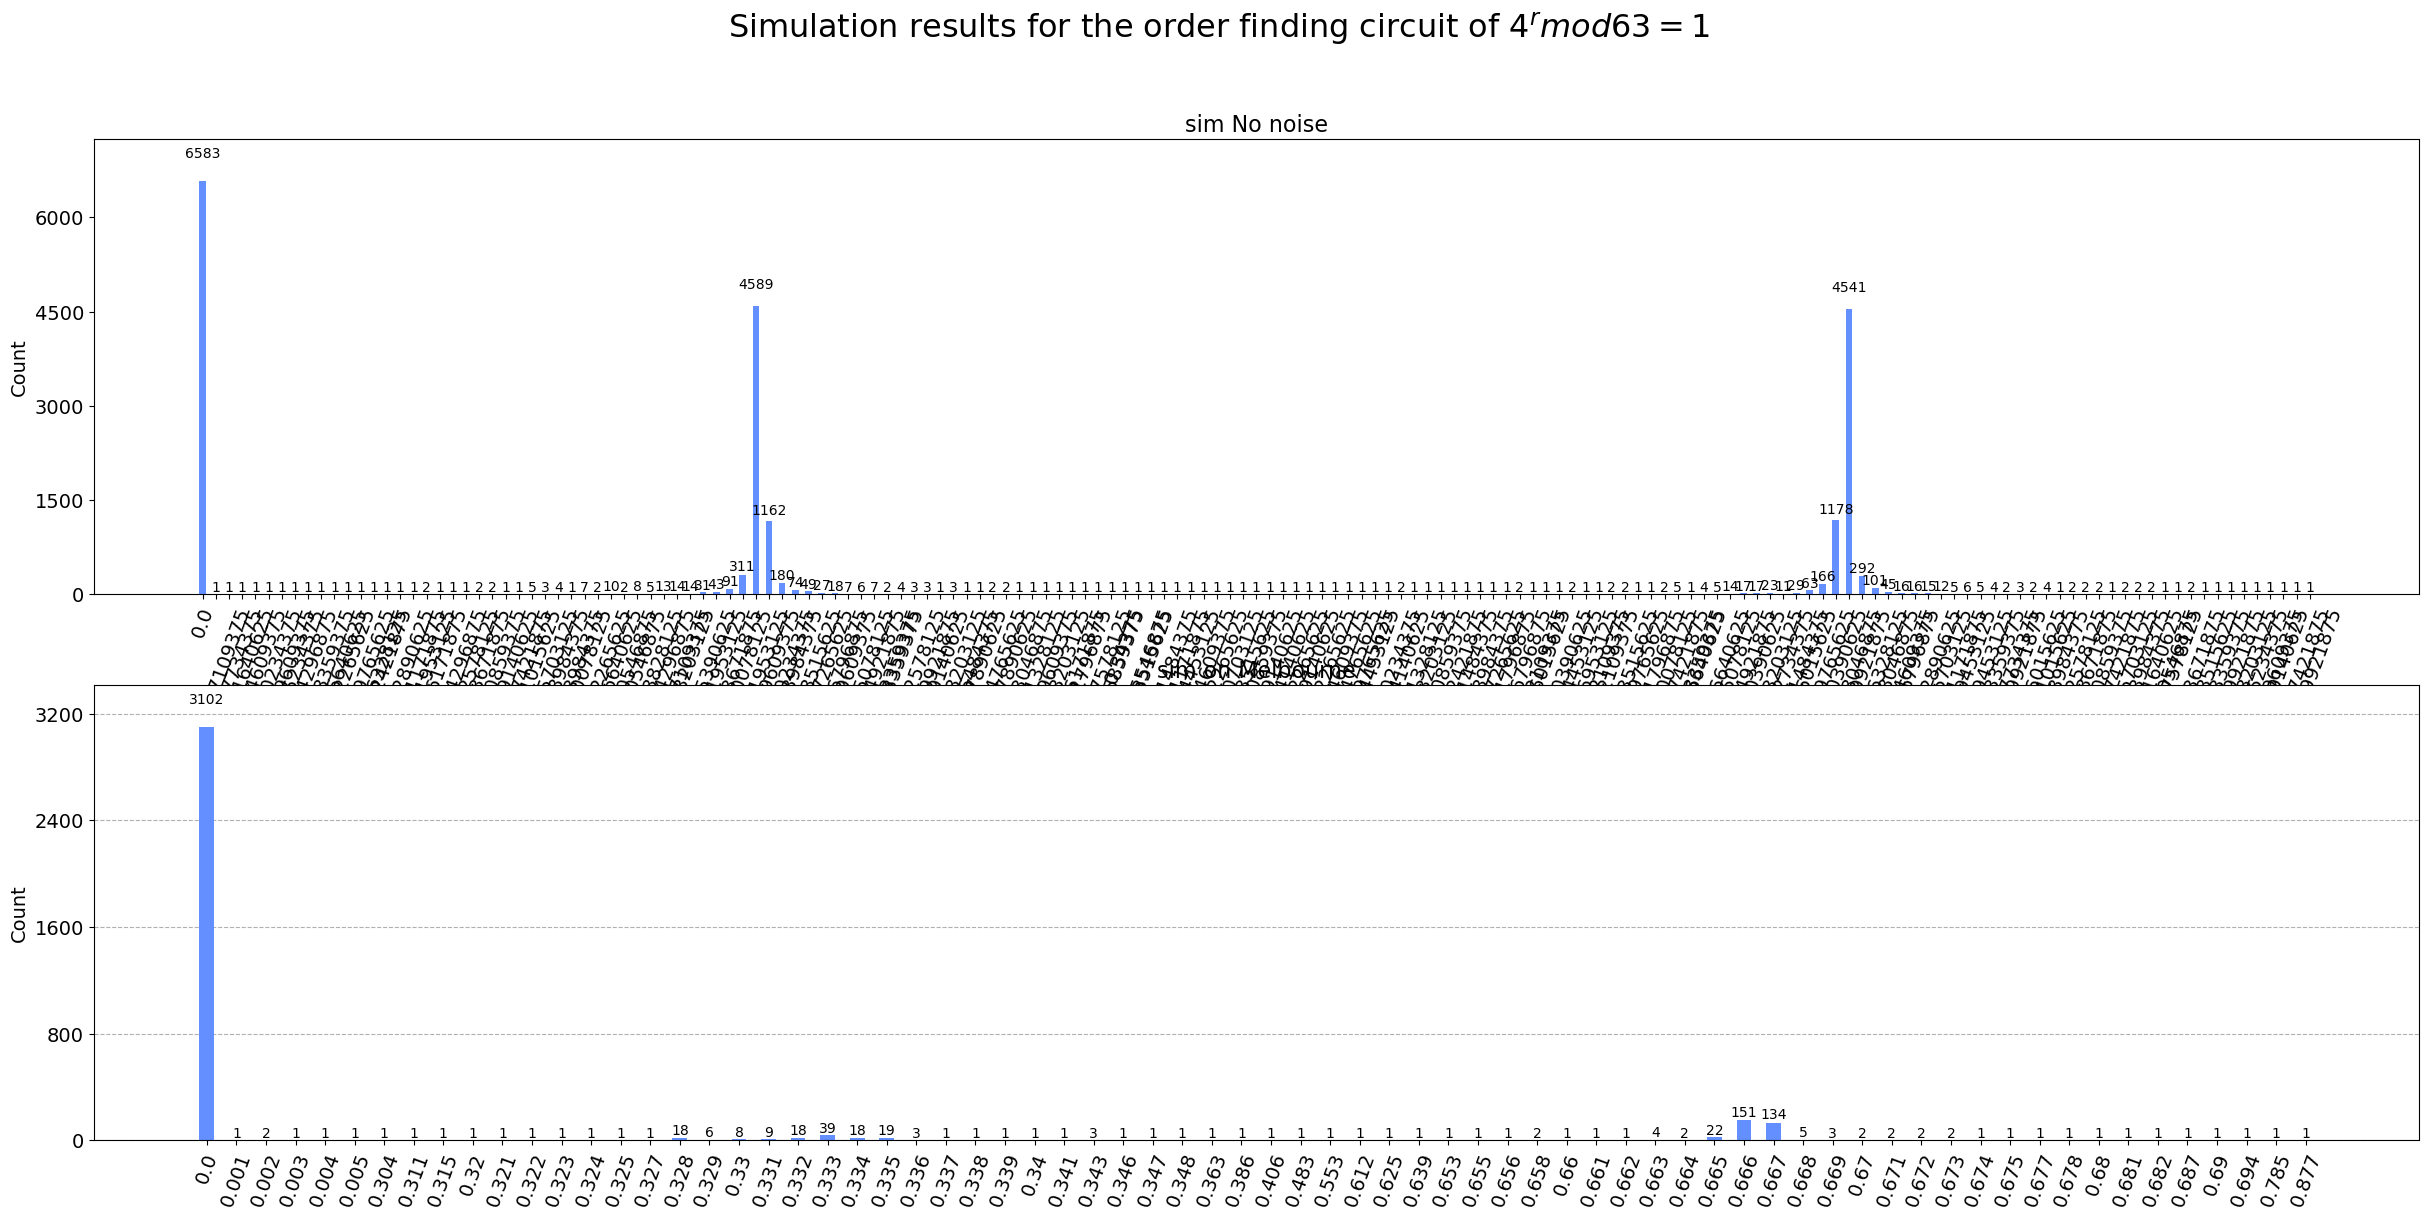

In [134]:
fig, ax = plt.subplots(2,1, figsize=(30,13))
fig.suptitle('Simulation results for the order finding circuit of $'+str(a)+'^{r} mod '+str(2**m -1)+' = 1$', fontsize=23)
plot_histogram(count_new_Orig, ax=ax[0])
plot_histogram(count_new_Orig_noise, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim on Melbourne', fontsize=16)
plt.show()

![](image/L5_textbook_result.png)

&#128211; Carry out the same task for the circuits, `shor_QPE`.

In [135]:
### your code goes here
shorQPE_trans = transpile(shor_QPE, backend, optimization_level=3)
count_shorQPE_noise = sim_Melborne.run(shor_QPE_trans, shots=shots).result().get_counts()



In [136]:
key_new = [str(np.round(int(key,2)/2**t,3)) for key in count_shorQPE_noise.keys()]
count_new_QPE_noise = dict(zip(key_new, count_shorQPE_noise.values()))




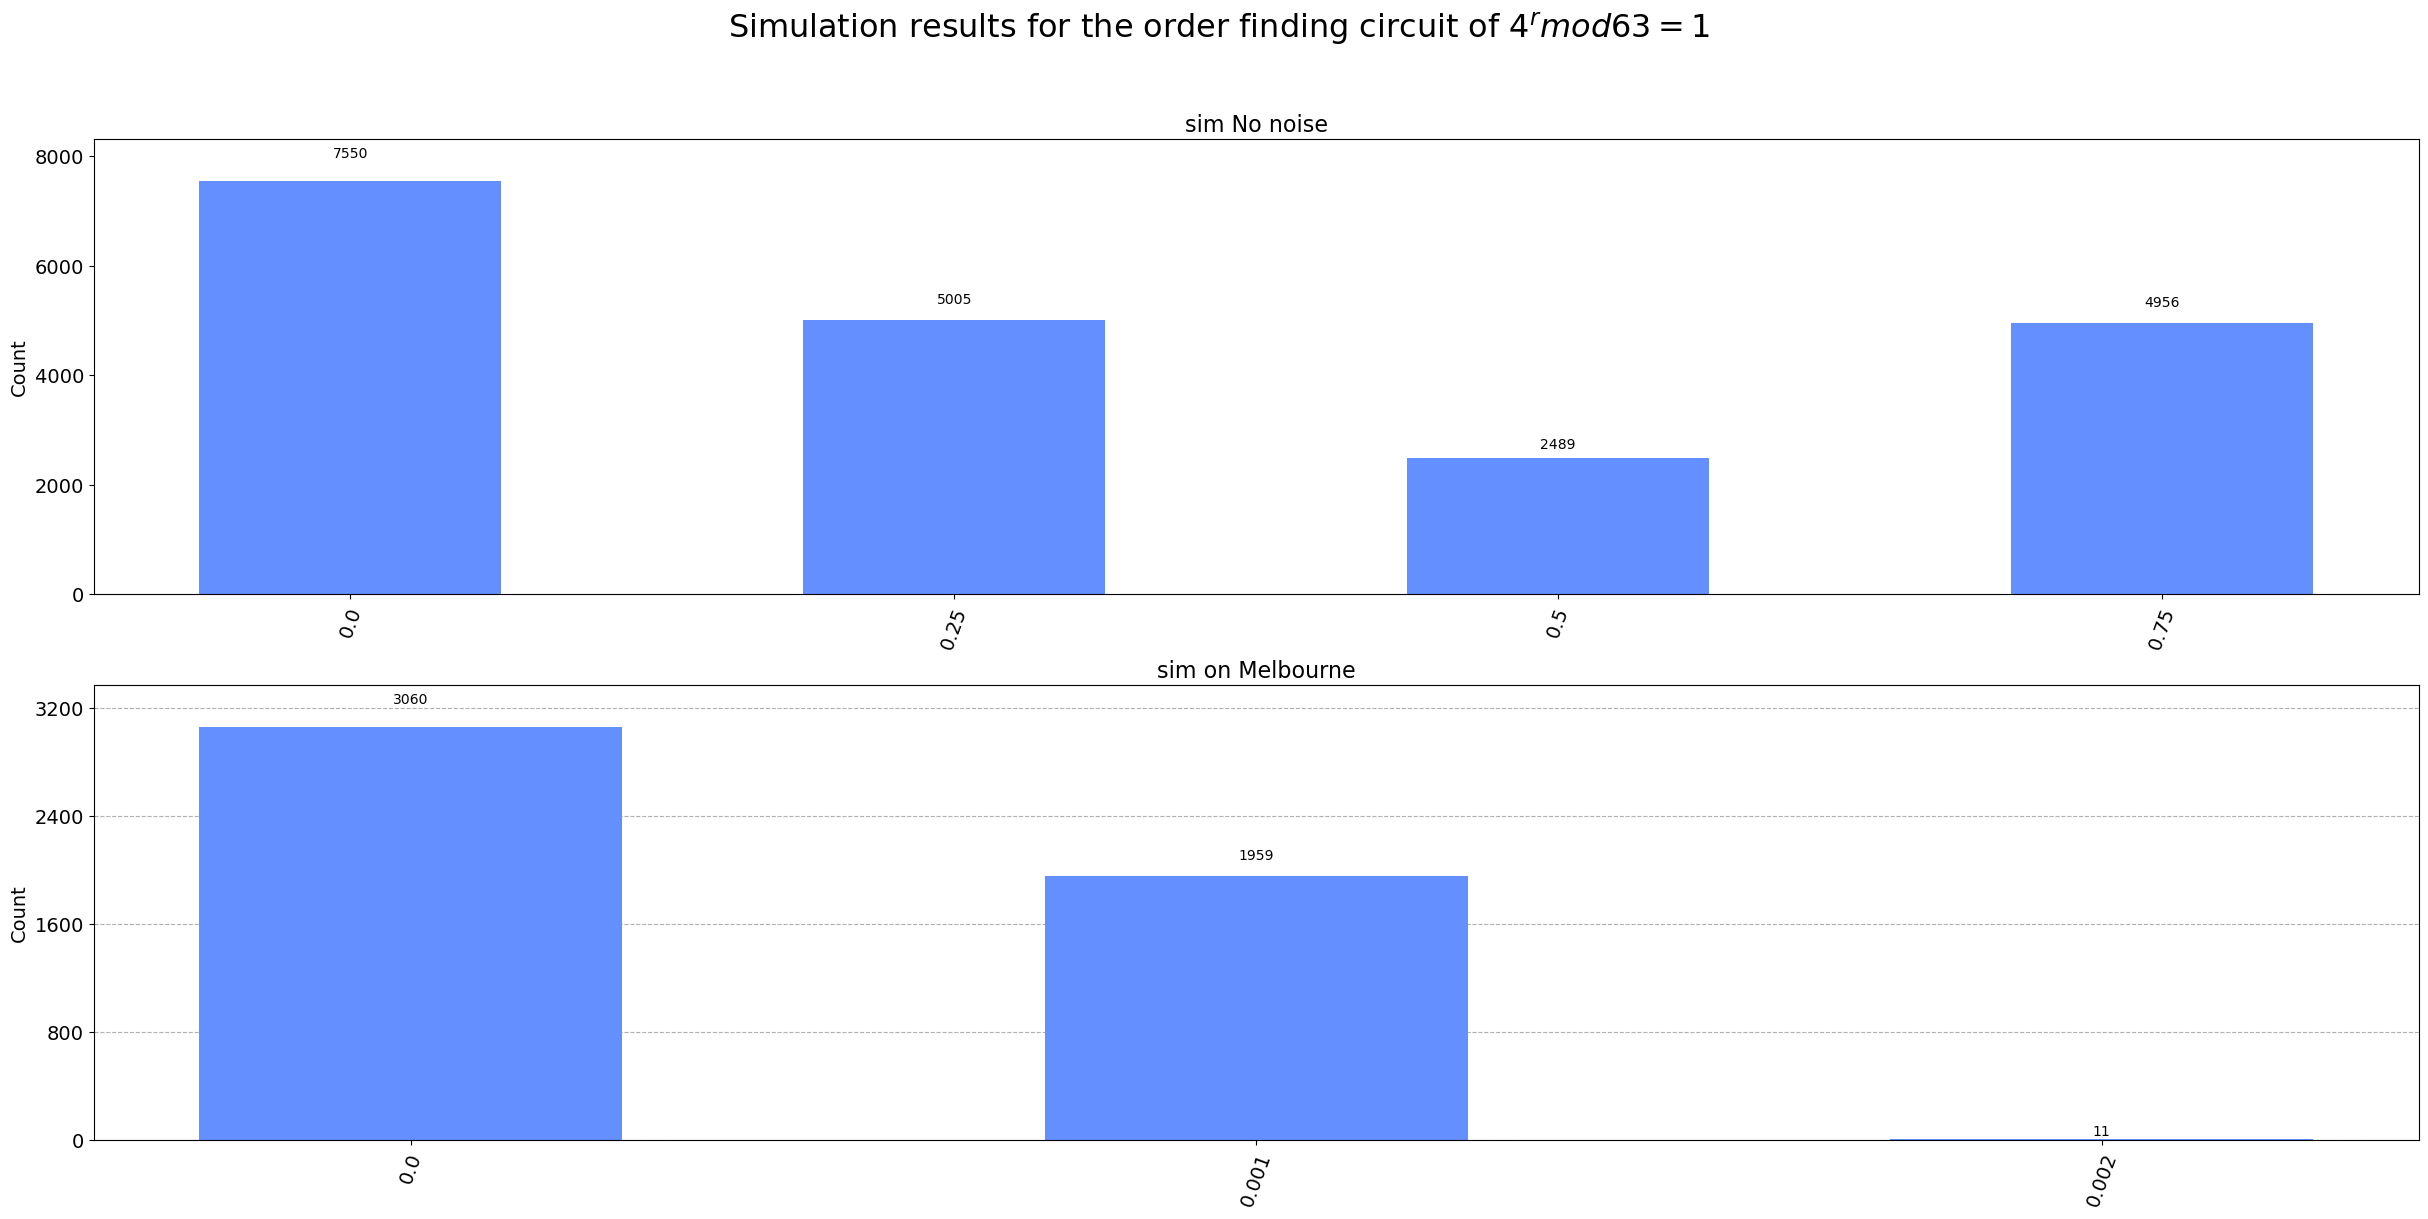

In [137]:

fig, ax = plt.subplots(2,1, figsize=(30,13))
fig.suptitle('Simulation results for the order finding circuit of $'+str(a)+'^{r} mod '+str(2**m -1)+' = 1$', fontsize=23)
plot_histogram(count_new_QPE, ax=ax[0])
plot_histogram(count_new_QPE_noise, ax=ax[1])
ax[0].set_title('sim No noise', fontsize=16)
ax[1].set_title('sim on Melbourne', fontsize=16)
plt.show()












## Discussion

Total Computation time for :
    Shor's original $\approx$ 184 minutes
    Shor's QPE $\approx$ 5 minutes

However, we notice that the results of Shor QPE are not exactly matching with non-noise simulations. This is because the QPE circuit is not optimized for the value of N = 63 

# Making things even more interesting

### The treatment above was for when N is of the form $2^m-1$, below I create a circuit for any general N.

### Define the necessary functions as described by the general implementation
> Beauregard, S. (2002). Circuit for Shor's algorithm using 2n+3 qubits. arXiv. https://doi.org/10.48550/arXiv.quant-ph/0205095

In [138]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, IBMQ, BasicAer


import math
import numpy as np

def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m


def create_QFT(circuit,up_reg,n,with_swaps):
    i=n-1

    while i>=0:
        circuit.h(up_reg[i])        
        j=i-1  
        while j>=0:
            if (np.pi)/(pow(2,(i-j))) > 0:
                circuit.cp( (np.pi)/(pow(2,(i-j))) , up_reg[i] , up_reg[j] )
                j=j-1   
        i=i-1  

    
    if with_swaps==1:
        i=0
        while i < ((n-1)/2):
            circuit.swap(up_reg[i], up_reg[n-1-i])
            i=i+1


def create_inverse_QFT(circuit,up_reg,n,with_swaps):
    
    if with_swaps==1:
        i=0
        while i < ((n-1)/2):
            circuit.swap(up_reg[i], up_reg[n-1-i])
            i=i+1
    

    i=0
    while i<n:
        circuit.h(up_reg[i])
        if i != n-1:
            j=i+1
            y=i
            while y>=0:
                 if (np.pi)/(pow(2,(j-y))) > 0:
                    circuit.cp( - (np.pi)/(pow(2,(j-y))) , up_reg[j] , up_reg[y] )
                    y=y-1   
        i=i+1


def getAngles(a,N):
    s=bin(int(a))[2:].zfill(N) 
    angles=np.zeros([N])
    for i in range(0, N):
        for j in range(i,N):
            if s[j]=='1':
                angles[N-i-1]+=math.pow(2, -(j-i))
        angles[N-i-1]*=np.pi
    return angles

#Create a cc phase gate
def ccphase(circuit,angle,ctl1,ctl2,tgt):
    circuit.cp(angle/2,ctl1,tgt)
    circuit.cx(ctl2,ctl1)
    circuit.cp(-angle/2,ctl1,tgt)
    circuit.cx(ctl2,ctl1)
    circuit.cp(angle/2,ctl2,tgt)

#Create circuit that performs addition by a in Fourier Space

def phiADD(circuit,q,a,N,inv):
    angle=getAngles(a,N)
    for i in range(0,N):
        if inv==0:
            circuit.p(angle[i],q[i])
        else:
            circuit.p(-angle[i],q[i])

# controlled fourier add
def cphiADD(circuit,q,ctl,a,n,inv):
    angle=getAngles(a,n)
    for i in range(0,n):
        if inv==0:
            circuit.cp(angle[i],ctl,q[i])
        else:
            circuit.cp(-angle[i],ctl,q[i])
        
# cc fourier add
def ccphiADD(circuit,q,ctl1,ctl2,a,n,inv):
    angle=getAngles(a,n)
    for i in range(0,n):
        if inv==0:
            ccphase(circuit,angle[i],ctl1,ctl2,q[i])
        else:
            ccphase(circuit,-angle[i],ctl1,ctl2,q[i])

# circuit for cc modulo add    
def ccphiADDmodN(circuit, q, ctl1, ctl2, aux, a, N, n):
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 0)
    phiADD(circuit, q, N, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.cx(q[n-1],aux)
    create_QFT(circuit,q,n,0)
    cphiADD(circuit, q, aux, N, n, 0)
    
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.x(q[n-1])
    circuit.cx(q[n-1],aux)
    circuit.x(q[n-1])
    create_QFT(circuit,q,n,0)
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 0)

# inverse of add modulo
def ccphiADDmodN_inv(circuit, q, ctl1, ctl2, aux, a, N, n):
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.x(q[n-1])
    circuit.cx(q[n-1],aux)
    circuit.x(q[n-1])
    create_QFT(circuit, q, n, 0)
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 0)
    cphiADD(circuit, q, aux, N, n, 1)
    create_inverse_QFT(circuit, q, n, 0)
    circuit.cx(q[n-1], aux)
    create_QFT(circuit, q, n, 0)
    phiADD(circuit, q, N, n, 0)
    ccphiADD(circuit, q, ctl1, ctl2, a, n, 1)

# circuit for c mult modulo N
def cMULTmodN(circuit, ctl, q, aux, a, N, n):
    create_QFT(circuit,aux,n+1,0)
    for i in range(0, n):
        ccphiADDmodN(circuit, aux, q[i], ctl, aux[n+1], int(math.pow(2,i)*a) % N, N, n+1)
    create_inverse_QFT(circuit, aux, n+1, 0)

    for i in range(0, n):
        circuit.cswap(ctl,q[i],aux[i])

    a_inv = modinv(a, N)
    create_QFT(circuit, aux, n+1, 0)
    i = n-1
    while i >= 0:
        ccphiADDmodN_inv(circuit, aux, q[i], ctl, aux[n+1], int(math.pow(2,i)*a_inv) % N, N, n+1)
        i -= 1
    create_inverse_QFT(circuit, aux, n+1, 0)

The unitary operator $U$ is defined as $U|x\rangle \equiv |ax(mod N)\rangle$.

In [147]:
## Create 7mod15 gate
N = 127
a = 8
m = int(np.ceil(np.log2(N)))
print(m)

aux = QuantumRegister(m+2)
up_reg = QuantumRegister(1)
down_reg = QuantumRegister(m)
down_reg_classic = ClassicalRegister(m)
up_reg_classic =   ClassicalRegister(1)
aux_classic = ClassicalRegister(m+2)

qc = QuantumCircuit(down_reg , up_reg , aux)#, down_reg_classic, up_reg_classic, aux_classic)

#set control register to be a superposition of both on and off
qc.h(up_reg[0])

#cMULTmodN(qc, up_reg[0], down_reg, aux, int(a), N, m)

# set input vector = |2>
qc.x(down_reg[1])
cMULTmodN(qc, up_reg[0], down_reg, aux, int(a), N, m)

#qc.measure_all()


7


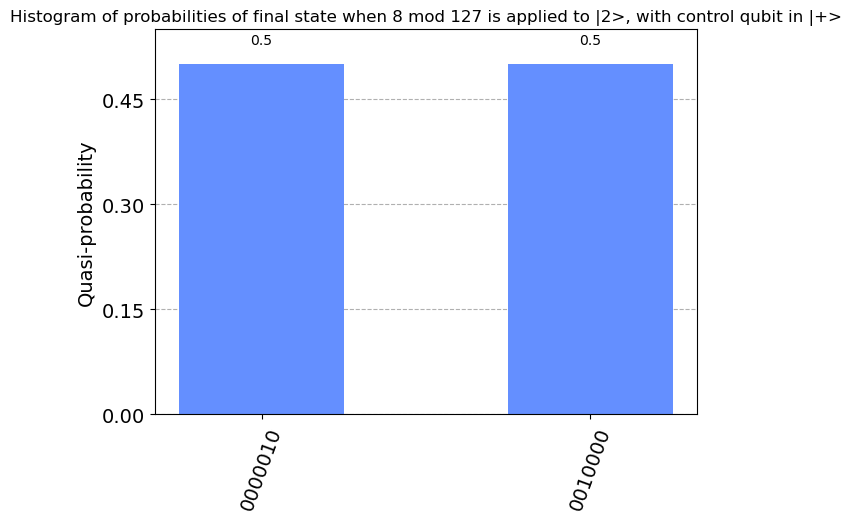

In [152]:

count_axmodN = execute(qc, backend=BasicAer.get_backend('statevector_simulator'),shots=1024).result().get_counts()
key_new = [str(key[-m::]) for key in count_axmodN.keys()]
count_axmodN = dict(zip(key_new, count_axmodN.values()))
plot_histogram(count_axmodN, title = "Histogram of probabilities of final state when "+str(a)+" mod "+str(N)+" is applied to |2>, with control qubit in |+>")

In [153]:
qc.depth()

2333

## Discussion

Total Computation time for non-noisy state vector simulation of the general circuit is: 25s

The diagram for the above described circuit is present in the next section. as we saw above, the depth of the circuit is huge (>2000) so the circuit will be hugely prone to noise, but on a state vector simulator we are able to get the correct resutls for the $\ket{ax\mod N }$ circuit.

In [144]:

qc.draw()



»
q4250_0: ──────────────────────────────────────────────────────────────────────»
         ┌───┐                                                                 »
q4250_1: ┤ X ├─────────────────────────────────────────────────────────────────»
         └───┘                                                                 »
q4250_2: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4250_3: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4250_4: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4250_5: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4250_6: ──────────────────────────────────────────────────────────────────────»
         ┌───┐                                                                 »
  q4249: ┤ H ├─────────────────────────────────────────────────────────────────»
         └───┘                                                                 »
q4248_0: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4248_1: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4248_2: ──────────────────────────────────────────────────────────────────────»
                                                                               »
q4248_3: ───────────────────────────────────────────────■──────────────────────»
                                                        │                      »
q4248_4: ─────────────────────────────■─────────────────┼─────────■────────────»
                                      │                 │         │       ┌───┐»
q4248_5: ───────────────■─────────────┼────────■────────┼─────────┼───────┤ H ├»
                        │       ┌───┐ │        │P(π/2)  │         │P(π/4) └───┘»
q4248_6: ──────■────────┼───────┤ H ├─┼────────■────────┼─────────■────────────»
         ┌───┐ │P(π/2)  │P(π/4) └───┘ │P(π/8)           │P(π/16)               »
q4248_7: ┤ H ├─■────────■─────────────■─────────────────■──────────────────────»
         └───┘                                                                 »
q4248_8: ──────────────────────────────────────────────────────────────────────»
                                                                               »
«                                                                       »
«q4250_0: ──────────────────────────────────────────────────────────────»
«                                                                       »
«q4250_1: ──────────────────────────────────────────────────────────────»
«                                                                       »
«q4250_2: ──────────────────────────────────────────────────────────────»
«                                                                       »
«q4250_3: ──────────────────────────────────────────────────────────────»
«                                                                       »
«q4250_4: ──────────────────────────────────────────────────────────────»
«                                                                       »
«q4250_5: ──────────────────────────────────────────────────────────────»
«                                                                       »
«q4250_6: ──────────────────────────────────────────────────────────────»
«                                                                       »
«  q4249: ──────────────────────────────────────────────────────────────»
«                                                           